# MO434 - Final S1
## Physionet Challenge 2020


## Code loading

Firstly, the training, inference and evaluation scripts are loaded from the remote repository.

In [1]:
!git clone https://github.com/Kotzly/physionet-challenge-2020.git

Cloning into 'physionet-challenge-2020'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (668/668), done.
remote: Compressing objects: 100% (333/333), done.
remote: Total 668 (delta 385), reused 598 (delta 331), pack-reused 0
Receiving objects: 100% (668/668), 733.01 KiB | 1.02 MiB/s, done.
Resolving deltas: 100% (385/385), done.


In [2]:
%cd physionet-challenge-2020
!git pull
%cd ..

/content/physionet-challenge-2020
Already up to date.
/content


## Data Loading

Then the datasets are download, they are 6 in total. All recordings are then copied to the same folder.

In [3]:
!gdown --id "1-5x4KIbnr7Lj1tVmMkuTnqznk7x5Vf4R"

Downloading...
From: https://drive.google.com/uc?id=1-5x4KIbnr7Lj1tVmMkuTnqznk7x5Vf4R
To: /content/PhysioNetChallenge2020_Training_2.tar.gz
423MB [00:08, 48.2MB/s]


In [4]:
!gdown --id "1-33KhbVm-BSfBHt2LYgZ6Q5zdPu8AlQ8"

Downloading...
From: https://drive.google.com/uc?id=1-33KhbVm-BSfBHt2LYgZ6Q5zdPu8AlQ8
To: /content/PhysioNetChallenge2020_Training_CPSC.tar.gz
860MB [00:11, 74.3MB/s]


In [5]:
!gdown --id "1-HuKofw5BFjBL69X5W2BiRnRpqy3V__i"

Downloading...
From: https://drive.google.com/uc?id=1-HuKofw5BFjBL69X5W2BiRnRpqy3V__i
To: /content/PhysioNetChallenge2020_Training_E.tar.gz
502MB [00:10, 46.8MB/s]


In [6]:
!gdown --id "1-KjbowxvHaCUPz23A_ujBnlujyFswaw6"

Downloading...
From: https://drive.google.com/uc?id=1-KjbowxvHaCUPz23A_ujBnlujyFswaw6
To: /content/PhysioNetChallenge2020_Training_PTB-XL.tar.gz
1.45GB [00:28, 51.4MB/s]


In [7]:
!gdown --id "1-9f0JFg_QoPfHAZ_zj4dkLfT3X9B39x9"

Downloading...
From: https://drive.google.com/uc?id=1-9f0JFg_QoPfHAZ_zj4dkLfT3X9B39x9
To: /content/PhysioNetChallenge2020_Training_PTB.tar.gz
933MB [00:16, 55.4MB/s]


In [8]:
!gdown --id "1-AQuoTSL1KD2J0N0y-U886n_Mdx_oIAf"

Downloading...
From: https://drive.google.com/uc?id=1-AQuoTSL1KD2J0N0y-U886n_Mdx_oIAf
To: /content/PhysioNetChallenge2020_Training_StPetersburg.tar.gz
591MB [00:11, 53.7MB/s]


In [9]:
import os

tar_files = os.listdir()
tar_files = [x for x in tar_files if x.endswith("gz")]

!mkdir dataset

for filename in tar_files:
  !tar -xf "{filename}" -C dataset

In [10]:
!mv dataset/Training_2/* dataset

In [11]:
!mv dataset/Training_WFDB/* dataset

In [12]:
%%bash 
for filename in dataset/WFDB/*; do
  mv $filename dataset
done

In [13]:
!rm -rf dataset/Training_2/ dataset/Training_WFDB/ dataset/WFDB

In [14]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local

--2021-01-20 11:41:04--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89817099 (86M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  85.66M  5.84MB/s    in 17s     

2021-01-20 11:41:22 (5.15 MB/s) - ‘mini.sh’ saved [89817099/89817099]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py38_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py38_0
    - cffi==1.14.0=py38h2e261b9_0
    - chardet==3.0.4=py38_1003
    - conda-package-handling==1.6.0=py38h7b6447c_0
    - conda==4.8.2=py38_0
    - cryptography==2.8

## Model training


In [15]:
!python --version

Python 3.8.1


In [16]:
%cd physionet-challenge-2020

/content/physionet-challenge-2020


In [17]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating physionet_challenge.egg-info
writing physionet_challenge.egg-info/PKG-INFO
writing dependency_links to physionet_challenge.egg-info/dependency_links.txt
writing requirements to physionet_challenge.egg-info/requires.txt
writing top-level names to physionet_challenge.egg-info/top_level.txt
writing manifest file 'physionet_challenge.egg-info/SOURCES.txt'
reading manifest file 'physionet_challenge.egg-info/SOURCES.txt'
writing manifest file 'physionet_challenge.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/physionet_challenge
copying physionet_challenge/__init__.py -> build/lib/physionet_challenge
creating build/lib/physionet_challenge/evaluation
copying physionet_challenge/evaluation/__init__.py -> build/lib/physionet_challenge/evaluation
copying physionet_challenge/evaluation/evaluation.py -> build/lib/physio

In [18]:
from PIL import Image
%matplotlib inline
!pip install ipykernel

     |████████████████████████████████| 120 kB 2.1 MB/s 
     |████████████████████████████████| 100 kB 5.0 MB/s 
     |████████████████████████████████| 108 kB 22.2 MB/s 
     |████████████████████████████████| 784 kB 15.7 MB/s 
     |████████████████████████████████| 427 kB 52.2 MB/s 
     |████████████████████████████████| 82 kB 592 kB/s 
     |████████████████████████████████| 8.9 MB 33.5 MB/s 
     |████████████████████████████████| 1.4 MB 50.7 MB/s 
     |████████████████████████████████| 59 kB 1.6 MB/s 
     |████████████████████████████████| 950 kB 3.3 MB/s 
     |████████████████████████████████| 355 kB 6.1 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 


In [19]:
!pip install tabnet==0.1.6

In [20]:
!python physionet_challenge/command/train_model.py ../dataset model_multibranch --split split.json --checkpoint checkpoint_146features --model multi --monitor val_loss --seed 10

2021-01-20 11:42:56.205828: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 11:42:56.205912: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
INFO:matplotlib.font_manager:Generating new fontManager, this may take some time...
Running training code...
No checkpoint. Loading data
	Loading labels
	Loading features
	Loading labels
	Loading features
Training model...
2021-01-20 12:09:12.891649: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-20 12:09:12.933542: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-20 12:09:13.002607: E tensorflow/stream_

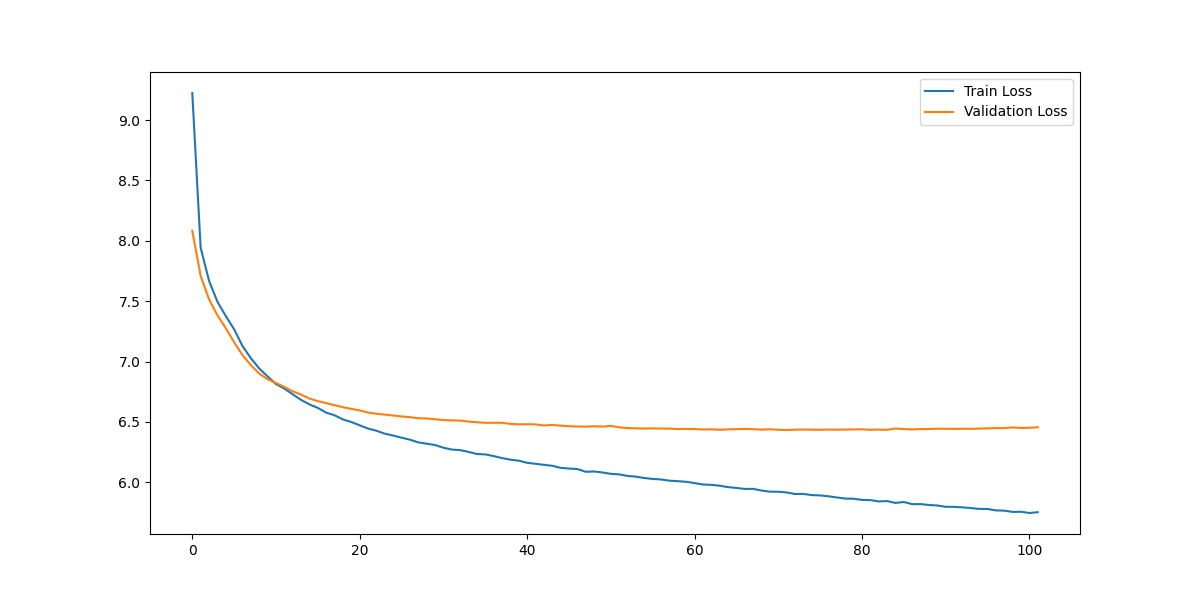

In [21]:
Image.open("plot_model_multibranch.png")

In [22]:
!python physionet_challenge/command/train_model.py ../dataset model_multibranch_focal --split split.json --checkpoint checkpoint_146features --model multi_focal --monitor val_loss --seed 10

2021-01-20 12:28:24.595620: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 12:28:24.595685: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running training code...
Found checkpoint
Training model...
2021-01-20 12:28:49.859744: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-20 12:28:49.861233: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-20 12:28:49.874147: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-20 12:28:49.874232: I tensorflow/stream_e

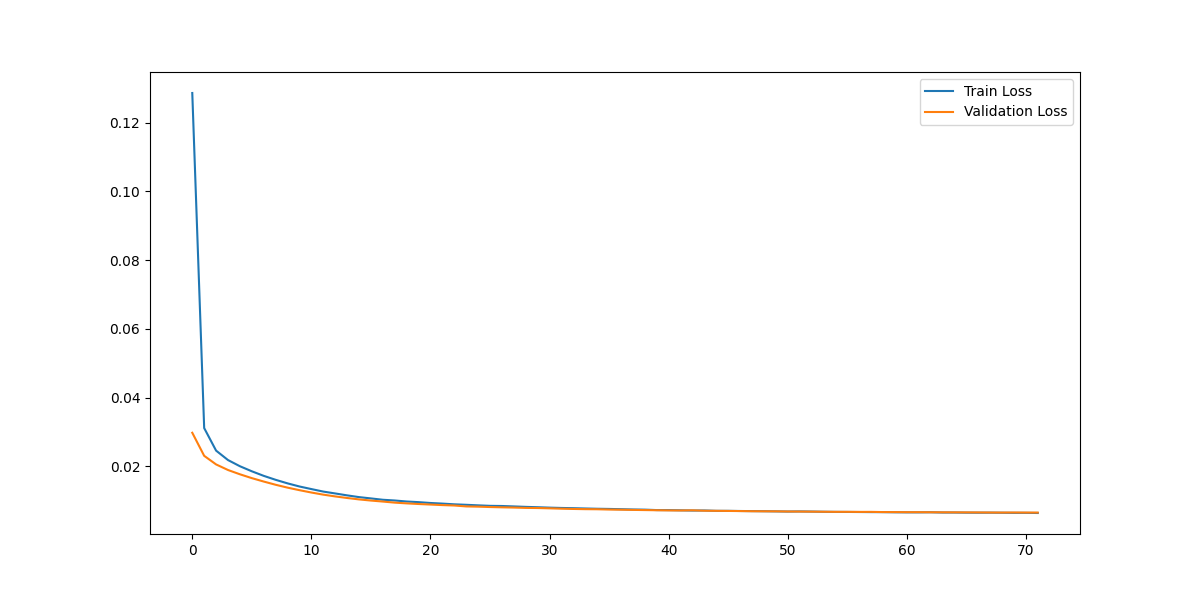

In [23]:
Image.open("plot_model_multibranch_focal.png")

In [24]:
!python physionet_challenge/command/train_model.py ../dataset model_multi_big --split split.json --checkpoint checkpoint_146features --model multi_big --monitor val_loss --seed 10

2021-01-20 12:42:54.464391: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 12:42:54.464460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running training code...
Found checkpoint
Training model...
2021-01-20 12:43:19.157953: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-20 12:43:19.160414: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-20 12:43:19.172754: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-20 12:43:19.172831: I tensorflow/stream_e

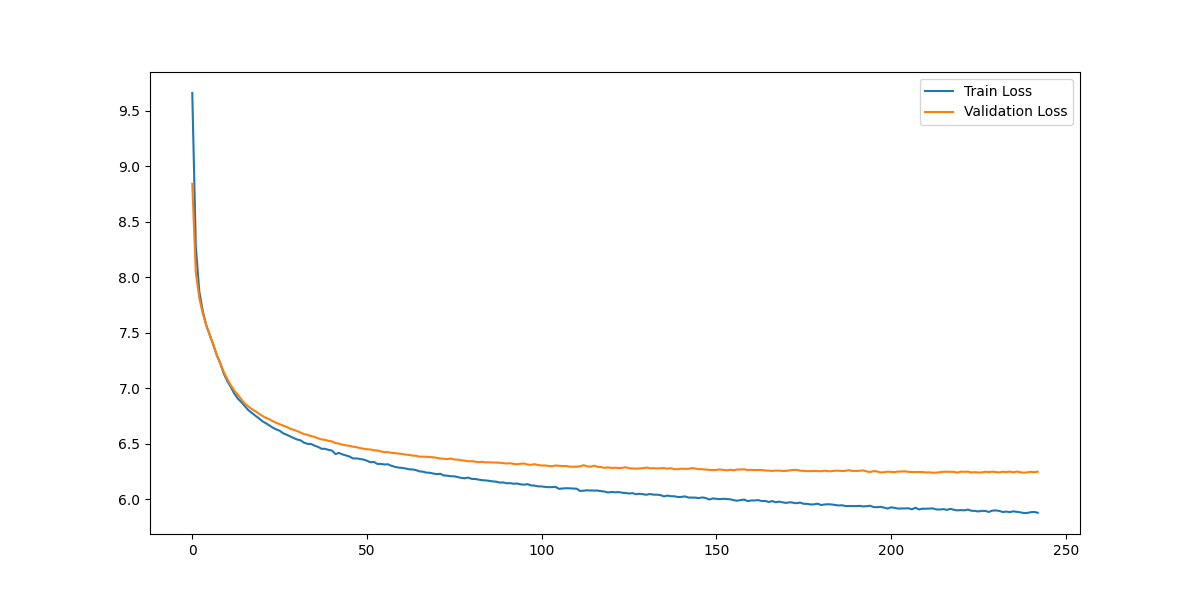

In [25]:
Image.open("plot_model_multi_big.png")

In [26]:
!python physionet_challenge/command/train_model.py ../dataset model_tabnet --split split.json --checkpoint checkpoint_146features --model tabnet --monitor val_loss --seed 10

2021-01-20 13:25:57.589997: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 13:25:57.590064: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running training code...
Found checkpoint
Training model...
2021-01-20 13:26:23.318443: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-20 13:26:23.321432: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-20 13:26:23.335460: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-20 13:26:23.335547: I tensorflow/stream_e

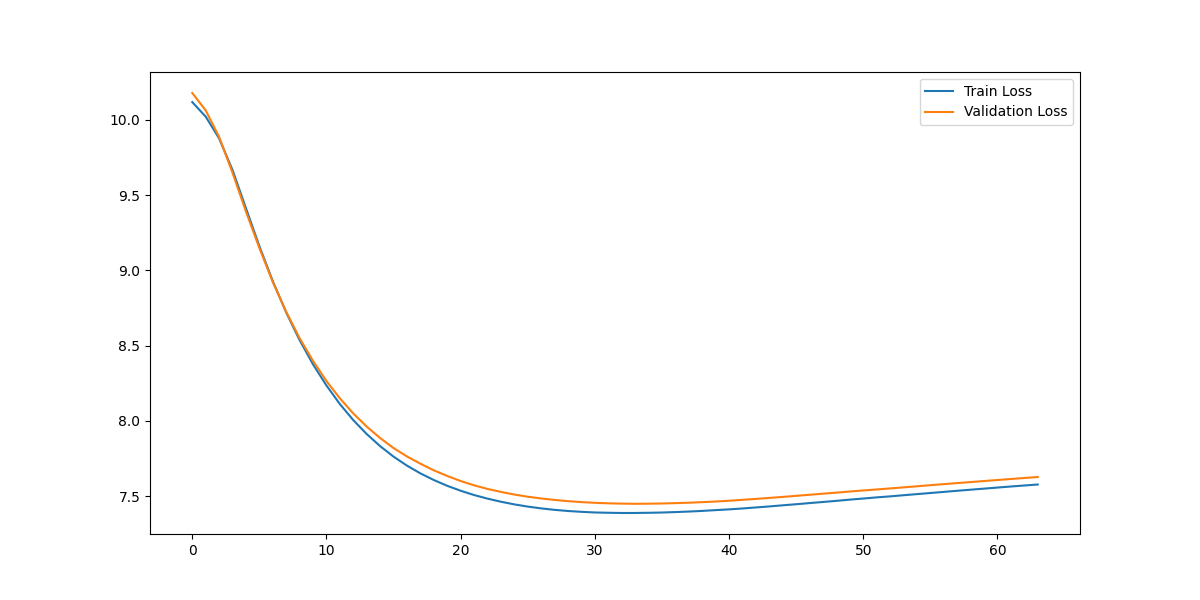

In [27]:
Image.open("plot_model_tabnet.png")

## Model inference

The model saved in the training step is loaded and used to infer the diagnostics for every recording in the test set. Each inference is saved in a specific inference folder.

In [37]:
%%bash
datasets="CPSC2018 INCART PTB G12EC"
rm -rf results.txt
for model_folder in model_*; do
  for dataset in $datasets; do
    inference_folder=inference_"$model_folder"_"dataset"
    echo "===================================================================================================================================" >> results.txt
    echo "Results for $model_folder and $dataset" >> results.txt
    python physionet_challenge/command/inference.py $model_folder ../dataset $inference_folder --split_filepath splits/dataset_split_test.json --split $dataset
    python physionet_challenge/evaluation/evaluation.py ../dataset $inference_folder splits/dataset_split_test.json $dataset > temp.txt
    tail temp.txt -n 7 >> results.txt
  done
done

cat results.txt

Loaded 2054 subjects from split CPSC2018
Loading 12ECG model...
Making predictions...
	2/2054...
	1002/2054...
	2002/2054...
Done.
Loaded 21 subjects from split INCART
Loading 12ECG model...
Making predictions...
	2/21...
Done.
Loaded 4468 subjects from split PTB
Loading 12ECG model...
Making predictions...
	2/4468...
	1002/4468...
	2002/4468...
	3002/4468...
	4002/4468...
Done.
Loaded 2075 subjects from split G12EC
Loading 12ECG model...
Making predictions...
	2/2075...
	1002/2075...
	2002/2075...
Done.
Loaded 2054 subjects from split CPSC2018
Loading 12ECG model...
Making predictions...
	2/2054...
	1002/2054...
	2002/2054...
Done.
Loaded 21 subjects from split INCART
Loading 12ECG model...
Making predictions...
	2/21...
Done.
Loaded 4468 subjects from split PTB
Loading 12ECG model...
Making predictions...
	2/4468...
	1002/4468...
	2002/4468...
	3002/4468...
	4002/4468...
Done.
Loaded 2075 subjects from split G12EC
Loading 12ECG model...
Making predictions...
	2/2075...
	1002/2075...


2021-01-20 15:18:02.639105: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 15:18:02.639162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-01-20 15:18:23.976938: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-20 15:18:23.979218: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-20 15:18:23.991000: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-20 15:18:23.991149: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not

In [38]:
!cat results.txt

Results for model_multi_big and CPSC2018
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.633,0.089,0.224,0.099,0.122,0.045,0.219
##################################################
Classes,270492004,164889003,164890007,426627000,713427006,713426002,445118002,39732003,164909002,251146004,698252002,10370003,284470004,427172004,164947007,111975006,164917005,47665007,427393009,426177001,426783006,427084000,164934002,59931005
AUROC,0.543,0.732,0.779,0.729,0.599,0.577,nan,nan,0.804,nan,nan,0.399,0.639,0.725,nan,0.383,nan,nan,0.638,0.884,0.789,0.820,0.627,0.094
AUPRC,0.118,0.225,0.043,0.066,0.249,0.013,nan,nan,0.144,nan,nan,0.001,0.134,0.041,nan,0.001,nan,nan,0.002,0.090,0.194,0.178,0.007,0.001
F-measure,0.140,0.342,0.069,0.131,0.339,0.000,0.000,0.000,0.275,0.000,nan,0.000,0.181,0.083,nan,0.000,0.000,0.000,0.000,0.062,0.330,0.220,0.000,0.000
Results for model_multi_big and INCART
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.500,0.0

In [29]:
!python physionet_challenge/command/inference.py model_multibranch ../dataset inference_multibranch --split_filepath split.json --split test
!python physionet_challenge/command/inference.py model_multibranch_focal ../dataset inference_multibranch_focal --split_filepath split.json --split test
!python physionet_challenge/command/inference.py model_multi_big ../dataset inference_multi_big --split_filepath split.json --split test
!python physionet_challenge/command/inference.py model_tabnet ../dataset inference_tabnet --split_filepath split.json --split test

2021-01-20 14:14:59.733090: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 14:14:59.733153: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loaded 8618 subjects from split test
Loading 12ECG model...
2021-01-20 14:15:23.628160: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-20 14:15:23.630148: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-20 14:15:23.643175: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-20 14:15:23.643247: I tensorflow/stream_e

## Model evaluation

The inference files are used to compute the metrics.

In [30]:
import pandas as pd
# Multi-branch big,0.799,0.197,0.299,0.194,0.194,0.091,0.070

txt = """,AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
Multi-branch,0.793,0.184,0.275,0.202,0.218,0.098,0.226
Baseline (MLP),0.799,0.197,0.323,0.183,0.176,0.086,0.079
Multi-branch focal loss,0.773,0.194,0.254,0.041,0.034,0.018,-0.523
TabNet,0.528,0.066,0.125,0.000,0.000,0.000,-0.823
"""
with open("txt.csv", "w") as file:
  file.write(txt)
pd.read_csv("txt.csv",index_col=0)

,AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
Multi-branch,0.793,0.184,0.275,0.202,0.218,0.098,0.226
Baseline (MLP),0.799,0.197,0.323,0.183,0.176,0.086,0.079
Multi-branch focal loss,0.773,0.194,0.254,0.041,0.034,0.018,-0.523
TabNet,0.528,0.066,0.125,0.000,0.000,0.000,-0.823


In [31]:
!python physionet_challenge/evaluation/evaluation.py ../dataset inference_multibranch split.json test

2021-01-20 14:43:10.424590: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 14:43:10.424661: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loading weights...
Loading label and output files...
Step 1 - finding files.
A6745.hea ../dataset inference_multibranch
Step 2 - load labels
100% 8618/8618 [00:00<00:00, 23610.74it/s]
Step 3 - loading outputs
Evaluating model...
- AUROC and AUPRC...
- Accuracy...
- F-measure...
- F-beta and G-beta measures...
- Challenge metric...
Done.
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.793,0.184,0.275,0.202,0.218,0.098,0.226
##################################################
Classes,270492004,164889003,164890007,42

In [32]:
!python physionet_challenge/evaluation/evaluation.py ../dataset inference_multibranch_focal split.json test

2021-01-20 14:43:34.912822: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 14:43:34.912899: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loading weights...
Loading label and output files...
Step 1 - finding files.
A6745.hea ../dataset inference_multibranch_focal
Step 2 - load labels
100% 8618/8618 [00:00<00:00, 23889.58it/s]
Step 3 - loading outputs
Evaluating model...
- AUROC and AUPRC...
- Accuracy...
- F-measure...
- F-beta and G-beta measures...
- Challenge metric...
Done.
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.773,0.194,0.254,0.041,0.034,0.018,-0.523
##################################################
Classes,270492004,164889003,16489

In [33]:
!python physionet_challenge/evaluation/evaluation.py ../dataset inference_tabnet split.json test

2021-01-20 14:43:58.012657: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 14:43:58.012716: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loading weights...
Loading label and output files...
Step 1 - finding files.
A6745.hea ../dataset inference_tabnet
Step 2 - load labels
100% 8618/8618 [00:00<00:00, 23219.32it/s]
Step 3 - loading outputs
Evaluating model...
- AUROC and AUPRC...
- Accuracy...
- F-measure...
- F-beta and G-beta measures...
- Challenge metric...
Done.
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.528,0.066,0.125,0.000,0.000,0.000,-0.823
##################################################
Classes,270492004,164889003,164890007,426627

In [34]:
!python physionet_challenge/evaluation/evaluation.py ../dataset inference_multi_big split.json test

2021-01-20 14:44:21.102278: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-01-20 14:44:21.102341: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Loading weights...
Loading label and output files...
Step 1 - finding files.
A6745.hea ../dataset inference_multi_big
Step 2 - load labels
100% 8618/8618 [00:00<00:00, 23304.69it/s]
Step 3 - loading outputs
Evaluating model...
- AUROC and AUPRC...
- Accuracy...
- F-measure...
- F-beta and G-beta measures...
- Challenge metric...
Done.
AUROC,AUPRC,Accuracy,F-measure,Fbeta-measure,Gbeta-measure,Challenge metric
0.799,0.197,0.299,0.194,0.194,0.091,0.070
##################################################
Classes,270492004,164889003,164890007,4266